# **Analisi di vendita di uno store di abbigliamento vintage a Los Angeles, Modcloth.**

In questo notebook andrò a sviluppare degli insight sul dataset cercando di trovare delle correlazioni tra le variabili quanto più possibile significative per il topic da me scelto. Iniziamo con il visualizzare il dataset:

In [40]:
# Importazione delle librerie di interesse
import pandas as pd
import json

# lista per memorizzare tutti gli oggetti JSON
data_list = []

# lettura del file JSON riga per riga
with open(r"C:\Users\mrtn1\Downloads\modcloth_final_data.json\modcloth_final_data.json", "r") as f:
    for line in f:
        data_list.append(json.loads(line.strip()))

# converto la lista in un DataFrame
df = pd.DataFrame(data_list)
df

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29,7,5.0,d,38,34,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31,13,3.0,b,30,36,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30,7,2.0,b,NaN,32,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.00,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82785,807722,NaN,8,4.0,b,NaN,36,outerwear,NaN,5ft 8in,Jennifer,just right,fit,727820,8.50,average,Cute jacket!,Cute jacket!
82786,807722,NaN,12,5.0,ddd/f,NaN,34,outerwear,NaN,5ft 5in,Kelli,slightly long,small,197040,NaN,NaN,It's a beautiful jacket.,It's a beautiful jacket. I love how it's knit ...
82787,807722,NaN,12,5.0,dddd/g,36.0,32,outerwear,NaN,5ft 4in,elacount,just right,fit,102493,NaN,NaN,I love this blazer. It is,I love this blazer. It is a great office piece...
82788,807722,NaN,12,4.0,NaN,NaN,NaN,outerwear,NaN,5ft 3in,jennaklinner,just right,fit,756491,NaN,NaN,I love this blazer!! I wo,I love this blazer!! I wore it yesterday and g...


Come possiamo notare, questi dati di vendita presentano una varietà di caratteristiche per ogni capo di abbigliamento, spaziando per oltre 80000 oggetti. Una prima considerazione che mi sorge spontanea è quella di iniziare a visualizzare tutte le categorie presenti, in modo da poter eseguire in seguito delle valutazioni per "tipo" di vestiario:

In [41]:
#per visualizzare tutte le categorie imposto il codice sottoforma di dataframe per avere una visione più pulita dell'output atteso:
categories = pd.DataFrame(df['category'].unique(), columns=['unique_categories'])
categories

,unique_categories
0,new
1,dresses
2,wedding
3,sale
4,tops
5,bottoms
6,outerwear


Una prima analisi interessante potrebbe essere quella di valutare se la qualità del prodotto sia direttamnte proporzionale al livello di soddidfazione del cliente. Per fare questo prendiamo in considerazione le colonne *category*, *quality*, *review_text*:

In [42]:
#prima di proseguire voglio assicurarmi che tutte le colonne che rappresentano misure (con un numero) abbiano un datatype numerico:
colonne_da_stampare = ['waist', 'size', 'quality', 'hips', 'bra size', 'bust', 'height']
print(df[colonne_da_stampare].dtypes)

waist        object
size          int64
quality     float64
hips         object
bra size     object
bust         object
height       object
dtype: object


In [43]:

# seleziono le colonne di interesse
cols_to_convert = ['waist','hips', 'bra size', 'bust']
#creo un ciclo sulla lista di colonne
for col in cols_to_convert:
    # converte in float64, inserisce NaN per valori non numerici
    df[col] = pd.to_numeric(df[col], errors='coerce') 

# la colonna height è impostata in ft, utilizzerò quindi una funzione ad hoc per convertirla in float64:
def convert_height_to_inches(height):
    try:
        # estrae i piedi (ft) e i pollici (in)
        feet = 0
        inches = 0
        if 'ft' in height:
            feet = int(height.split('ft')[0].strip())  # parte prima di "ft"
        if 'in' in height:
            inches = int(height.split('ft')[1].split('in')[0].strip())  # parte prima di "in"
        return feet * 12 + inches  # converte in pollici
    except:
        return None  # gestisce valori non validi

# applico la funzione alla colonna 'height'
df['height_numeric'] = df['height'].apply(convert_height_to_inches) # applico la funzione di conversione numerica
df['height_cm'] = df['height_numeric'] * 2.54 # creo una colonna per rappresentare le altezze in centimetri
df.drop(columns=['height','height_numeric'], inplace=True) # cancello le colonne che non mi servono più modificando il df originale

# Verifica delle conversioni
print(df.dtypes)
df


item_id            object
waist             float64
size                int64
quality           float64
cup size           object
hips              float64
bra size          float64
category           object
bust              float64
user_name          object
length             object
fit                object
user_id            object
shoe size          object
shoe width         object
review_summary     object
review_text        object
height_cm         float64
dtype: object


,item_id,waist,size,quality,cup size,hips,bra size,category,bust,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text,height_cm
0,123373,29.0,7,5.0,d,38.0,34.0,new,36.0,Emily,just right,small,991571,NaN,NaN,NaN,NaN,167.64
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN,157.48
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,Ugggh,slightly long,small,395665,9.00,NaN,NaN,NaN,170.18
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN,157.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82785,807722,NaN,8,4.0,b,NaN,36.0,outerwear,NaN,Jennifer,just right,fit,727820,8.50,average,Cute jacket!,Cute jacket!,172.72
82786,807722,NaN,12,5.0,ddd/f,NaN,34.0,outerwear,NaN,Kelli,slightly long,small,197040,NaN,NaN,It's a beautiful jacket.,It's a beautiful jacket. I love how it's knit ...,165.10
82787,807722,NaN,12,5.0,dddd/g,36.0,32.0,outerwear,NaN,elacount,just right,fit,102493,NaN,NaN,I love this blazer. It is,I love this blazer. It is a great office piece...,162.56
82788,807722,NaN,12,4.0,NaN,NaN,NaN,outerwear,NaN,jennaklinner,just right,fit,756491,NaN,NaN,I love this blazer!! I wo,I love this blazer!! I wore it yesterday and g...,160.02


C:\Users\mrtn1\AppData\Local\Temp\ipykernel_16280\349763434.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group:


    category  correlation
4       sale     0.299306
3  outerwear     0.298708
1    dresses     0.275937
0    bottoms     0.274096
5       tops     0.268037
6    wedding     0.220674
2        new     0.196173


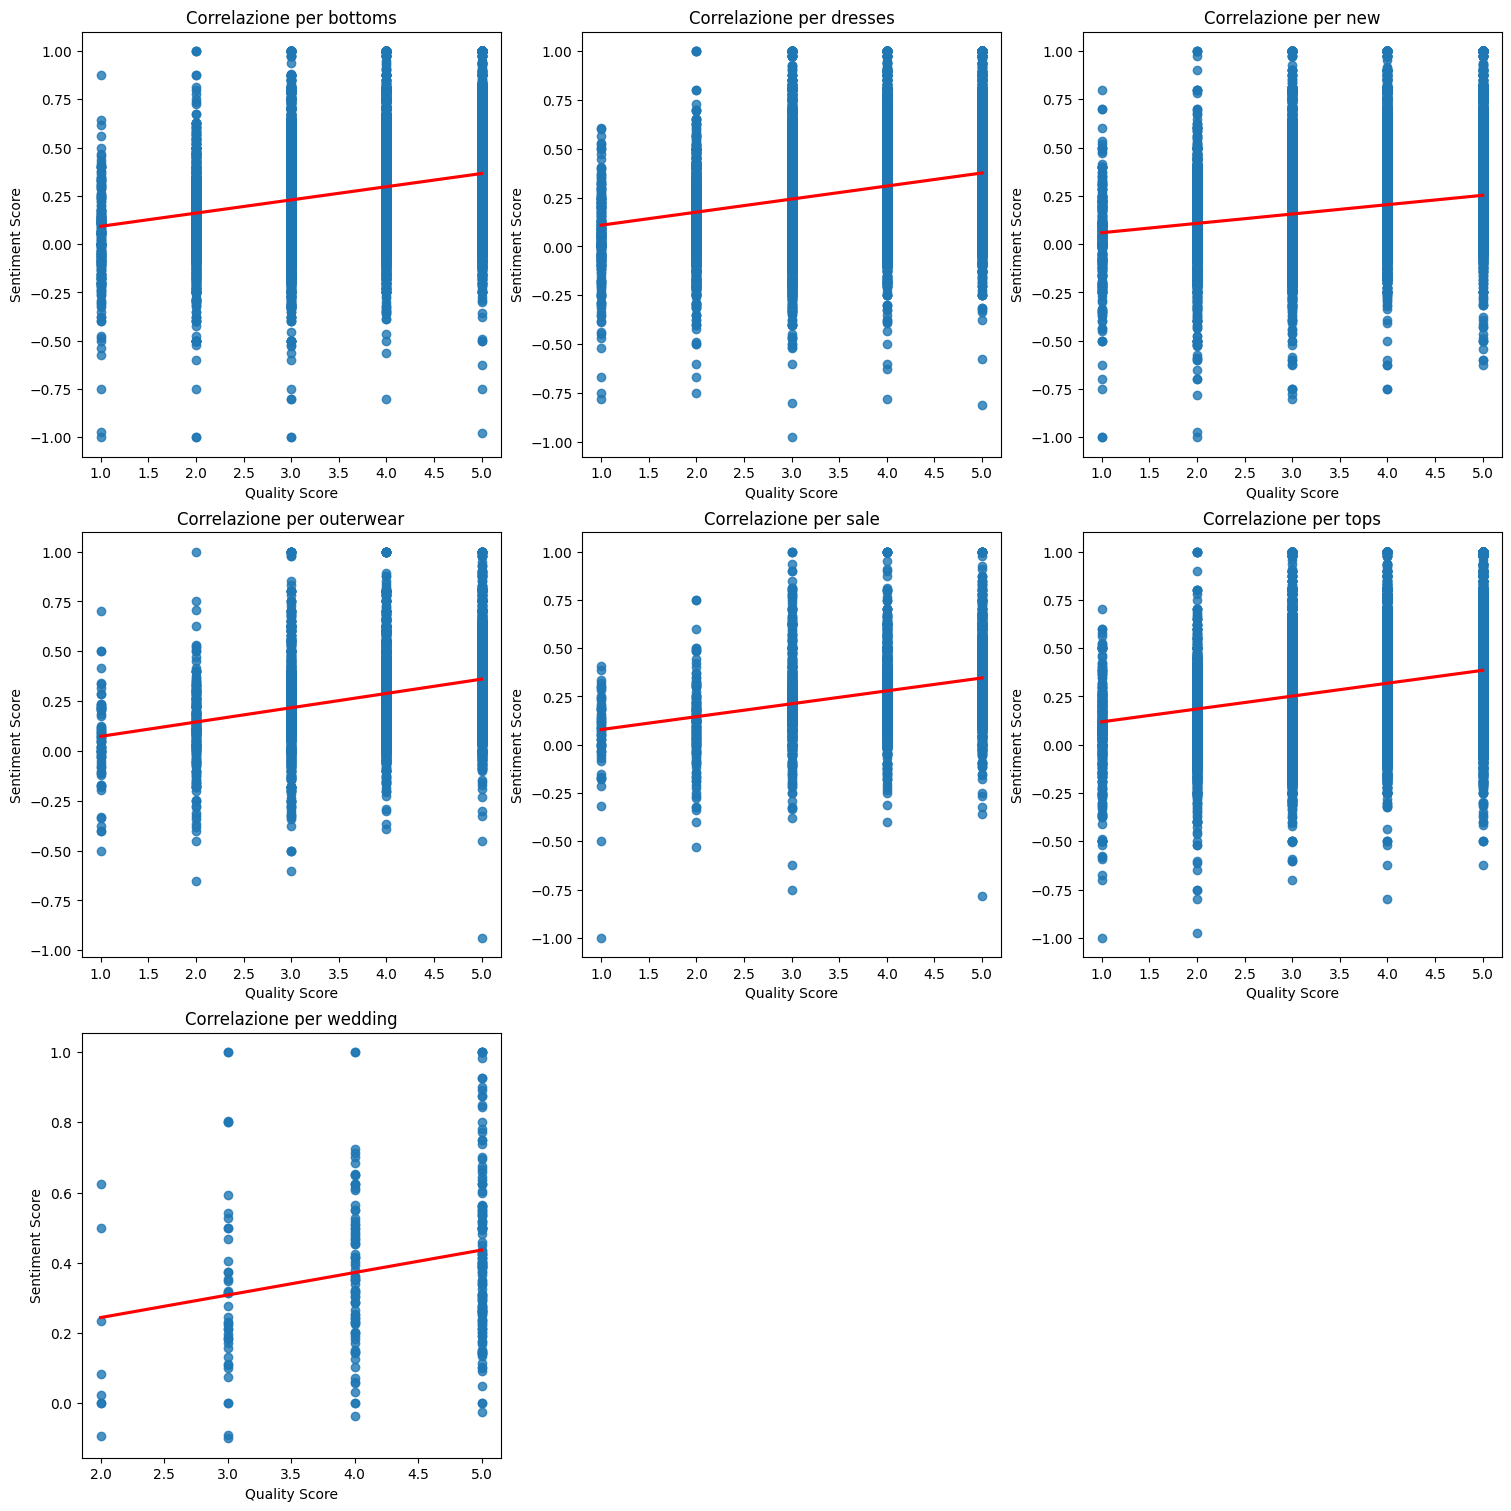

In [44]:
#Importazione delle librerie di interesse
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
# per una questione di scalabilità, estraggo dal dataset principale solo la parte che mi interessa in questo topic
subset = df.loc[:, ['category', 'quality', 'review_text']]

# creo una funzione per "convertire" le recensioni in un punteggio numerico
def analyze_sentiment(review):
    # la funzione "polarity" permette di assegnare a una serie di aggettivi un range di numeri da -1 (negativo) a +1 (positivo)
    sentiment = TextBlob(review).sentiment.polarity  
    # la funzione restituirà la nuova colonna di punteggio
    return sentiment
# la funzione polarity accetta solo input di tipo stringa, e i valori NaN potrebbero creare dei problemi di lettura
# a questo proposito sostituisco i valori NaN con stringhe vuote
subset['review_text'] = subset['review_text'].fillna("")

# applico la funzione prima impostata creando la nuova colonna
subset['sentiment_score'] = subset['review_text'].apply(analyze_sentiment)

# Raggruppo i dati per categoria
grouped = (
    subset.groupby('category')  # inizio il raggruppamento per la colonna 'category'
    .apply(lambda group: 
           group[['quality', 'sentiment_score']]  # estraggo le colonne rilevanti per ciascun gruppo (categoria)
           .corr().iloc[0, 1])  # calcolo della correlazione tra qualità e sentiment, rispettivamemte la riga 0 e la colonna 1 della matrice risultante
    .reset_index()  # resetto l'indice per ottenere un DataFrame
)
grouped.columns = ['category', 'correlation'] # rinomino le colonne risultanti


# Ordino il DataFrame in senso decrescente utilizzando il nome esplicito della colonna
grouped_sorted = grouped.sort_values(by='correlation', ascending=False)
print(grouped_sorted)

# inizio a raccogliere sottoforma di variabili i parametri che saranno utili alla stampa dei grafici
# seleziono i valori distinti per la colonna di categoria
categories = subset['category'].unique()
# estraggo il numero di categorie distinte
num_categories = len(categories)

cols = 3  # numero di colonne nei subplot
rows = math.ceil(num_categories / cols)  # numero di righe, arrotondando per eccesso

# creazione della figura
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5), constrained_layout=True)

# imposto un ciclo per stampare in serie un grafico per ogni categoria
# creo un oggetto numerato contente idx (indice), category (nome di ogni categoria distinta) e group (contenuto di ogni categoria)
for idx, (category, group) in enumerate(subset.groupby('category')):
    # divido il numero dell'indice per il numero di colonne in modo da aver restituito 
    # il quoziente (che sarà il n. di riga) e il resto (n. colonna)
    row, col = divmod(idx, cols)  # calcolo della posizione della sottotrama
    ax = axes[row, col]  # posizione risultante per ogni grafico
    #scelgo un grafico in cui viene evidenziata una linea di regressione 
    sns.regplot(data=group, x='quality', y='sentiment_score', scatter=True, ci=None, 
                line_kws={'color': 'red'}, ax=ax)
    # imposto gli Artist a mio piacimento
    ax.set_title(f"Correlazione per {category}")
    ax.set_xlabel("Quality Score")
    ax.set_ylabel("Sentiment Score")

# elimino i subplots vuoti nel caso in cui il numero di dati da visualizzare 
# sia inferiore al numero totale di sottotrame disponibili nella griglia.
for idx in range(num_categories, rows * cols): # questo range è un intervallo che parte dal primo indice inutilizzato 
    #(num_categories) e arriva fino all'ultimo indice della griglia (rows * cols).
    row, col = divmod(idx, cols) # posizione dei subplots in eccesso
    fig.delaxes(axes[row, col])  # elimino subplots non usati
# stampo i grafici:
plt.show()

Come è possibile osservare esiste una correlazione positiva tra il livello di qualità e il "punteggio" di recensione, soprattutto per le categorie *sales* e *outerwear*.
Tuttavia, rimane una relazione molto debole fra le due variabili, anche considerando che l'esperienza del cliente è molto soggetiva ed è influenzata da molti bias esterni. Il mondo dell'e-commerce è quindi molto complesso ed è raro trovare correlazioni molto alte per via dell'ampia varietà di fattori che influenzano le recensioni.
Mi chiedo quindi: quale pattern è possibile individuare in questo dataset? Una via percorribile potrebbe essere quella di entrare più nello specifico e valutare quanti capi vengono venduti per ogni tipologia di abbigliamento.

Inizio con il segmentare ogni categoria e visualizzare per ognuna il numero di capi venduti:

In [45]:
# con questo semplice metodo conto i valori per ogni gruppo (categoria)
category_counts = df['category'].value_counts()
print(category_counts)

category
new          21488
tops         20364
dresses      18650
bottoms      15266
outerwear     4223
sale          2524
wedding        275
Name: count, dtype: int64


Le prime quattro categorie sono piuttosto simili a livello di vendite, come invece potrebbe essere prevedibile, vi è una quantità di venduto più ristretta riguardo ai capi di abbigliamento in saldo e quelli nell'ambito dei matrimoni. Visualizziamo meglio questi risultati sottoforma di grafico, per un riscontro più immediato:

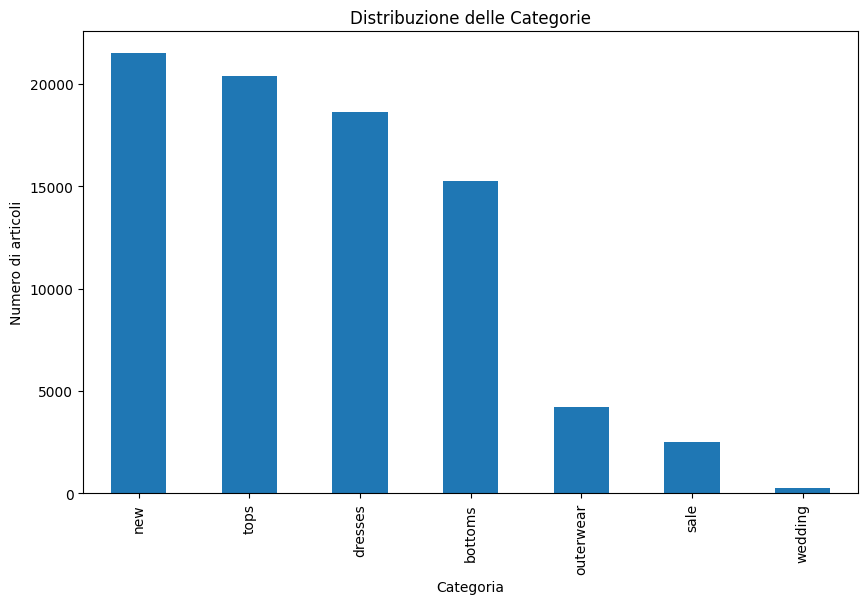

In [46]:
# imposto il grafico come metodo e scelgo la tipologia a barre per meglio visualizzare la portata di ogni categoria:
category_counts.plot(kind='bar', figsize=(10, 6), title='Distribuzione delle Categorie')
plt.xlabel('Categoria')
plt.ylabel('Numero di articoli')
plt.show()

Escludendo la categoria *new* (categoria mista) si può affermare che la clientela del negozio compra soprattutto *top* (es. maglioni e felpe) e *dresses* (vestiti).

Avendo chiaro per ogni categoria il suo venduto, viene spontaneo chiedersi quanto sia alta la qualità mediamente per queste categorie:

In [47]:
# una volta raggruppato il dataset per categoria, selezionato la colonna della qualità, ne calcolo la media:
quality_by_category = df.groupby('category')['quality'].mean()
print(quality_by_category)

category
bottoms      3.966428
dresses      4.004937
new          3.866207
outerwear    4.034352
sale         4.005976
tops         3.942697
wedding      4.312727
Name: quality, dtype: float64


Vediamolo meglio con un grafico:

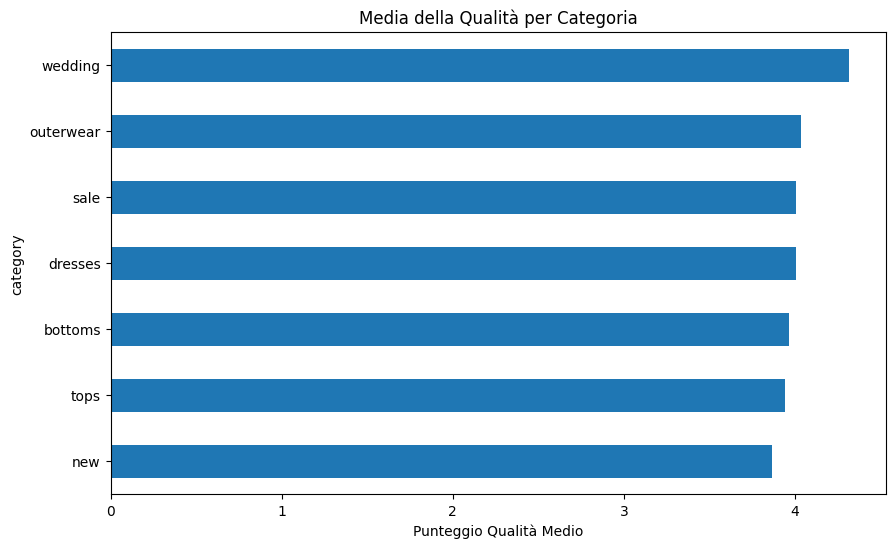

In [48]:
# in questo caso scelgo un grafico a barre orizzontali
quality_by_category.sort_values().plot(kind='barh', figsize=(10, 6), title='Media della Qualità per Categoria')
plt.xlabel('Punteggio Qualità Medio')
plt.show()

Questo grafico ci comunica qualcosa di più o meno prevedibile ma importante: seppur le recensioni non matchino fortemente con il livello di qualità, il livello di quest'ultimo rimane elevato per tutte le categorie di abbigliamento vendute. Si può dunque affermare che mantenere un livello di qualità alto ripaga sicuramente nell'ambito delle vendite.

Entriamo ancora più nello specifico: quali saranno le taglie che sono più vendute per ogni categoria? Prendiamo una tipologia di misura che rappresenta piuttosto bene tutte le categorie di abbigliamento: la colonna *size*

In [49]:
# di ogni gruppo (categoria) seleziono la colonna 'size' e ne conto il numero di valori
size_distribution = df.groupby('category')['size'].value_counts()
print(size_distribution)

category  size
bottoms   8       2850
          12      2524
          4       2209
          15      1558
          20      1193
                  ... 
wedding   1          1
          3          1
          18         1
          21         1
          30         1
Name: count, Length: 137, dtype: int64


C:\Users\mrtn1\AppData\Local\Temp\ipykernel_16280\2008282330.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=category_data, x='size', ax=ax, palette='Set2')
C:\Users\mrtn1\AppData\Local\Temp\ipykernel_16280\2008282330.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=category_data, x='size', ax=ax, palette='Set2')
C:\Users\mrtn1\AppData\Local\Temp\ipykernel_16280\2008282330.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=category_data, x='size', ax=ax, palette='Set2')
C:\Users\mrtn1\AppData\Local\Temp\ipyker

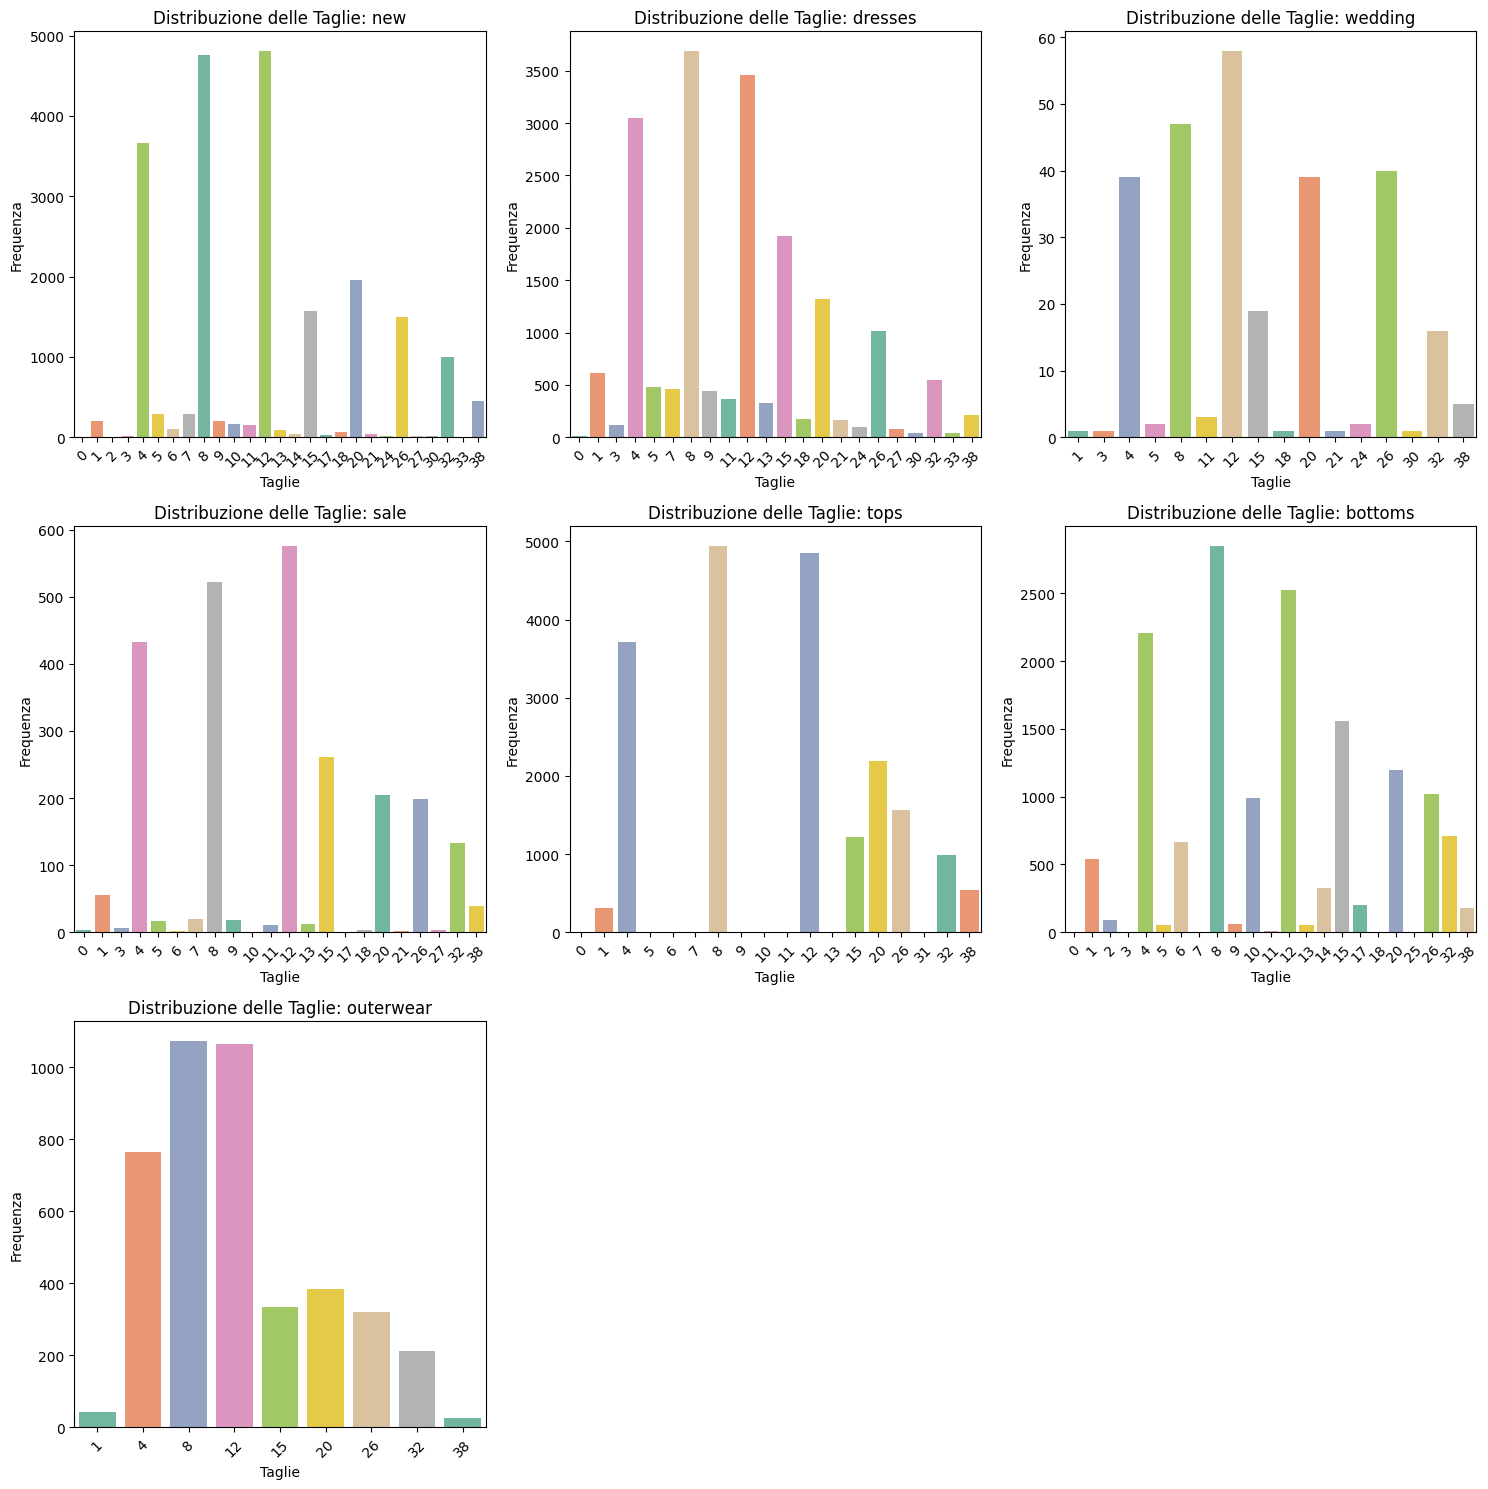

In [50]:
# Estraggo le categorie sottoforma di variabili
categories = df['category'].unique()

# imposto il numero di colonne e righe per i subplots
n_cols = 3  # numero di grafici per riga
n_rows = -(-len(categories) // n_cols)  # calcolo delle righe richieste (impostando il segno negativo il numero 
#viene arrotondato in eccesso, con il secondo "-" viene ripristinato il "+")

# creo la figura e i subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

# itero sulle categorie e sugli assi
for idx, category in enumerate(categories):
    ax = axes[idx // n_cols, idx % n_cols]  # ottengo le coordinate del grafico
    
    # filtro i dati per la categoria corrente
    category_data = df[df['category'] == category]
    
    # disegno il grafico (es. conteggio delle taglie)
    sns.countplot(data=category_data, x='size', ax=ax, palette='Set2')
    
    # configuro il titolo e gli assi
    ax.set_title(f'Distribuzione delle Taglie: {category}')
    ax.set_xlabel('Taglie')
    ax.set_ylabel('Frequenza')
    ax.tick_params(axis='x', rotation=45)

# elimino eventuali subplots vuoti
for idx in range(len(categories), n_rows * n_cols):
    fig.delaxes(axes[idx // n_cols, idx % n_cols])

# layout e visualizzazione
plt.tight_layout()
plt.show()

Nonostante le differenze di taglia fra le varie categorie, la maggior parte dei capi di abbigliamento ricadono nelle taglie 8 e 12 e di conseguenza si può affermare che questo negozio serve maggiormente clienti che possiedono quelle taglie specifiche.

E se volessimo sapere quanto è correlata la qualità rispetto ad alcune tipologie di taglie?

In [51]:
# seleziono le colonne di interesse e con il metodo corr() calcolo la matrice di correlazione
correlation_matrix = df[['quality', 'waist', 'size', 'hips']].corr()
print(correlation_matrix)

          quality     waist      size      hips
quality  1.000000  0.015710 -0.024556 -0.017317
waist    0.015710  1.000000  0.846494  0.832980
size    -0.024556  0.846494  1.000000  0.747257
hips    -0.017317  0.832980  0.747257  1.000000


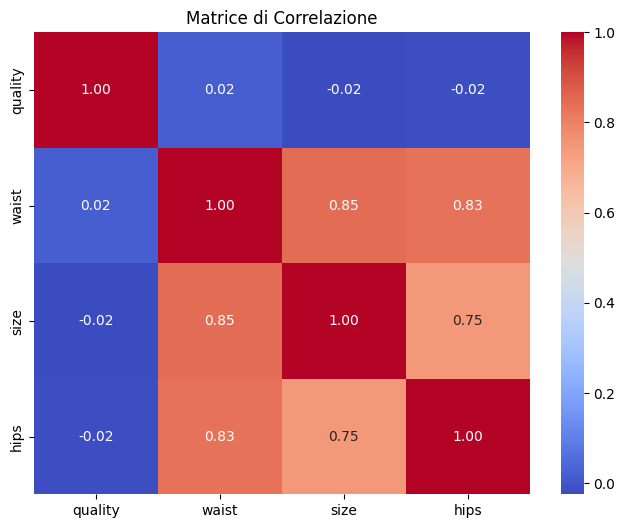

In [52]:
# imposto le caratteristiche della heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice di Correlazione')
plt.show()

Questa indagine ha dimostrato come praticamente non esista una correlazione fra l'incremento delle taglie con il rating della qualità, ma proseguiamo con un'altro topic.

Analizziamo le performance delle vendite con una lente di ingrandimento su alcune tipologie significative di misure:

Iniziamo con il prendere in considerazione la colonna *waist*.

C:\Users\mrtn1\AppData\Local\Temp\ipykernel_16280\1619938135.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='category', y='waist', palette='Set2')


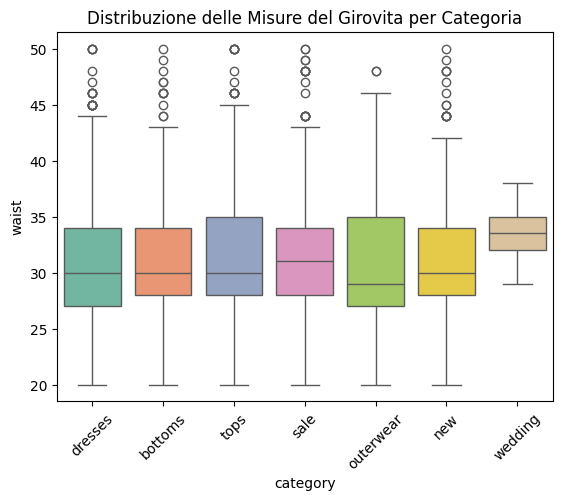

In [53]:
# ordino le righe per colonna, in modo da avere un ordine crescente nel grafico
df = df.sort_values(by='waist')
# imposto le caratteristiche del grafico a scatola
sns.boxplot(data=df, x='category', y='waist', palette='Set2')
plt.title('Distribuzione delle Misure del Girovita per Categoria')
plt.xticks(rotation=45)
plt.show()

Questo grafico ci dice qualcosa di piuttosto utile: 

### **Osservazioni Principali**

1. **Mediana**:
   - Le categorie **"wedding"** e **"sale"** presentano mediane del girovita più alte rispetto alle altre categorie, indicando che il negozio sa soddisfare questa tipologia di clientela          maggiormente in contesti di matrimoni e saldi.
   - Al contrario la categoria **"outerwear"** ha una mediana leggermente più bassa rispetto alle altre, indicando una tendenza verso misure del girovita inferiori.

2. **Distribuzione Generale**:
   - **Range Interquartile**: 
     - La categoria **"wedding"** e **"bottoms"** presenta una distribuzione particolarmente compatta, con un range interquartile più stretto, un'analisi ulteriore sarebbe quella di capire se dipende da un bacino di clientela più contenuto o una profondità assortimentale di taglie poco ampia.
     - Categorie come **"tops"** e **"outerwear"** hanno una distribuzione più ampia, indicando maggiore variabilità nei valori del girovita e quindi un range di clientela ampio.

3. **Outliers**:
   - La categoria **"new"** presenta un elevato numero di outliers, indicando un buon grado di successo verso possibili clienti dalle taglie meno standard.
   - Diversamente la categoria **"wedding"** rimane quella più coerente.


Questa volta prenderò in considerazione la colonna *height*, eseguirò un'analisi analoga ma stavolta servendomi di grafici a violino, per meglio visualizzare anche la densità:

C:\Users\mrtn1\AppData\Local\Temp\ipykernel_16280\2688245532.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='category', y='height_cm', scale='width', inner='quartile', palette='muted')
C:\Users\mrtn1\AppData\Local\Temp\ipykernel_16280\2688245532.py:7: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=df, x='category', y='height_cm', scale='width', inner='quartile', palette='muted')


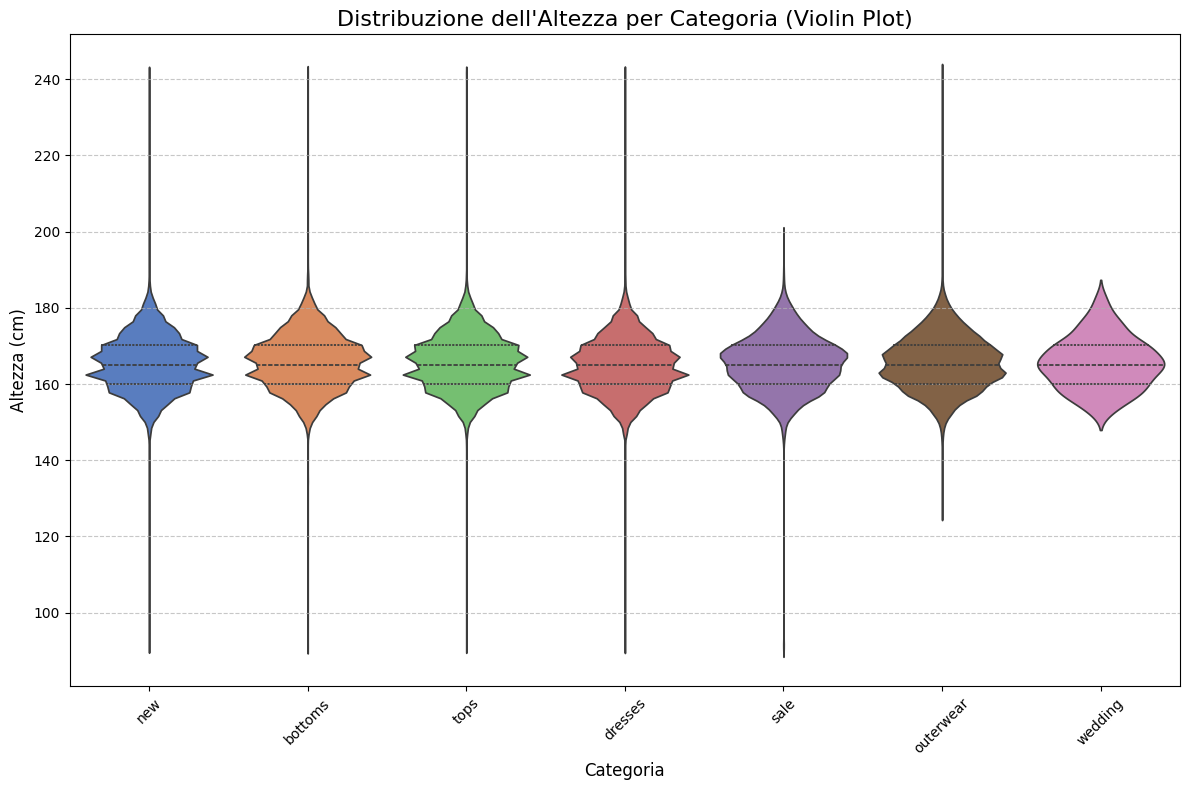

In [57]:
# ordino il df in direzione decrescente secondo la colonna 'height'
df = df.sort_values(by='height_cm')
# imposto la figura
plt.figure(figsize=(12, 8))

# creazione del grafico a violino
sns.violinplot(data=df, x='category', y='height_cm', scale='width', inner='quartile', palette='muted')

# impostazioni ulteriori al grafico
plt.title('Distribuzione dell\'Altezza per Categoria (Violin Plot)', fontsize=16)
plt.xlabel('Categoria', fontsize=12)
plt.ylabel('Altezza (cm)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# stampa del grafico
plt.tight_layout()
plt.show()

### **Osservazioni Chiave**

1. **Distribuzione Generale**:
   - Tutte le categorie presentano una distribuzione dell'altezza concentrata principalmente tra i **160** e **170 ft**.
   - La densità è maggiore in prossimità di questi valori, con alcune variazioni per ogni categoria.

2. **Range Esteso e Outlier**:
   - Le categorie **"new"**, **"bottoms"**, **"dresses"** e **"tops"** mostrano un **range di valori più esteso**, indicando la presenza di **outlier** significativi nella parte inferiore della distribuzione.
   - L'altezza minima raggiunge valori molto bassi (fino a 100 cm), mentre nella parte superiore si allunga oltre i **180 cm**.

3. **Mediana e Quartili**:
   - Tutte le categorie hanno mediane e linee interquartili molto vicine.
   - La categoria **"bottoms"** ha una distribuzione leggermente più alta rispetto alle altre, con una maggiore concentrazione verso l'alto.

4. **Categorie Distinte**:
   - La categoria **"wedding"** mostra una distribuzione più ristretta con minore dispersione, suggerendo anche qui una maggiore coerenza.

5. **Simmetria**:
   - La maggior parte delle categorie presenta distribuzioni **asimmetriche**.


Come se la cavano invece le varie categorie in termini di vestibilità?

In [58]:
# raccolgo la vestibilità per ogni categoria, infine uso il metodo unstack per trasformare  il risultato di un'aggregazione multi-indice
# migliorando così la leggibilità
fit_distribution = df.groupby('category')['fit'].value_counts(normalize=True).unstack()
print(fit_distribution)

fit             fit     large     small
category                               
bottoms    0.698284  0.134809  0.166907
dresses    0.727828  0.137373  0.134799
new        0.671212  0.138589  0.190199
outerwear  0.661378  0.193228  0.145394
sale       0.629952  0.171949  0.198098
tops       0.662836  0.204675  0.132489
wedding    0.796364  0.156364  0.047273


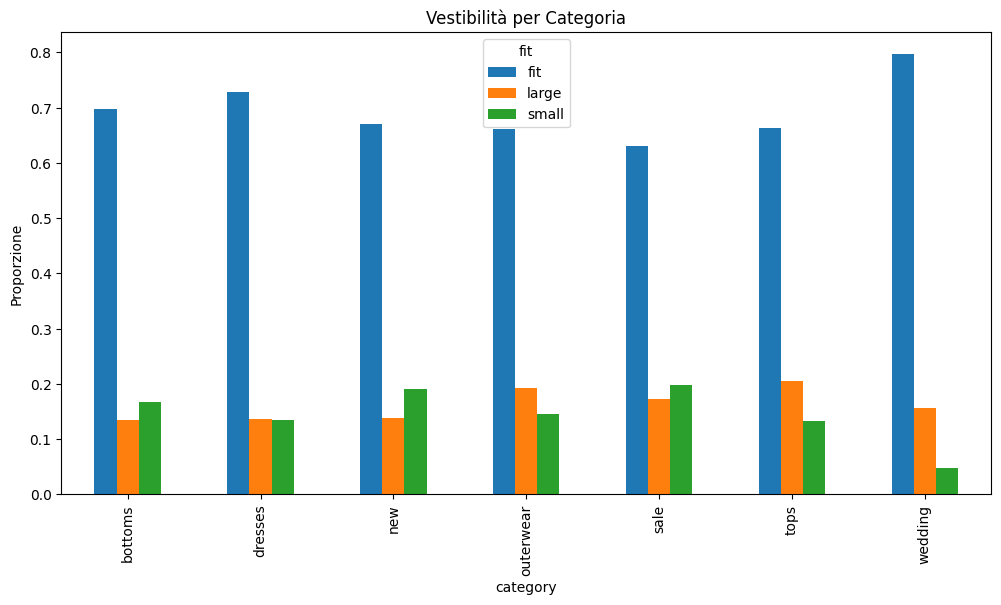

In [59]:
# scelgo un grafico a barre scegliendo di non impilare le quantità per categoria per una migliore visibilità (stacked=False)
fit_distribution.plot(kind='bar', stacked=False, figsize=(12, 6), title='Vestibilità per Categoria')
plt.ylabel('Proporzione')
plt.show()

 Cosa possiamo dire guardando questo output?

1. **Prevalenza della vestibilità "Fit" (perfetta):**
   - In tutte le categorie, la vestibilità **"Fit"** ha la proporzione più alta.  
     Ciò indica che nella maggior parte dei casi i clienti trovano che gli articoli siano della taglia giusta.

2. **Vestibilità "Large" e "Small" (troppo grande o troppo piccola):**
   - Le proporzioni delle vestibilità **"Too Large"** e **"Too Small"** variano leggermente tra le categorie:
     - **"Too Large" (arancione):** sembra essere più frequente rispetto a **"Too Small" (verde)** in alcune categorie, come `outerwear` e `wedding`.
     - **"Too Small" (verde):** è leggermente più prevalente in altre categorie, come `sale` e `new`.

3. **Differenze tra le categorie:**
   - La categoria `wedding` ha una proporzione molto bassa di articoli troppo piccoli, con una distribuzione fortemente centrata sulla vestibilità perfetta.
   - La categoria `dresses` presenta una distribuzione equilibrata tra gli articoli **"Too Large"** e **"Too Small"**.
   - La categoria `sale` e `outerwear` sembrano avere una percentuale relativamente alta di articoli non perfettamente adatti, sia troppo grandi che troppo piccoli, rispetto ad altre categorie.

4. **Possibili implicazioni per l'e-commerce:**
   - Le categorie `sale` e `outerwear` potrebbero richiedere un'attenzione particolare nella descrizione delle taglie, poiché mostrano una maggiore variabilità nella vestibilità.
   - La categoria `wedding`, che ha una vestibilità generalmente perfetta, potrebbe essere un esempio di successo nella corrispondenza delle taglie con le aspettative dei clienti.


*Grazie per l'attenzione!*